## Hands-on - Probability Distributions and Variability

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import binom, norm, ttest_1samp, mannwhitneyu, chi2_contingency

# Load dataset from GitHub URL
file_path = "https://raw.githubusercontent.com/Hamed-Ahmadinia/DASP-2025/main/epa-sea-level.csv"  # URL link to the dataset stored on GitHub

# Read the dataset into a pandas dataframe
df = pd.read_csv(file_path)  # Load the dataset as a pandas DataFrame

# Display the first few rows of the dataframe to confirm the data has been loaded correctly
print("Dataset Preview:")  # Print a label for context
print(df.head(5))  # Display the first 5 rows of the dataset

Dataset Preview:
   Year  CSIRO Adjusted Sea Level  Lower Error Bound  Upper Error Bound  \
0  1880                  0.000000          -0.952756           0.952756   
1  1881                  0.220472          -0.732283           1.173228   
2  1882                 -0.440945          -1.346457           0.464567   
3  1883                 -0.232283          -1.129921           0.665354   
4  1884                  0.590551          -0.283465           1.464567   

   NOAA Adjusted Sea Level  
0                      NaN  
1                      NaN  
2                      NaN  
3                      NaN  
4                      NaN  


## **Exercise 1: Understanding the Dataset**
🔹 **Question:** Display key statistics about the dataset using `.describe()`. `.

In [3]:
# Your code here:
df.describe()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
count,134.000000,134.000000,134.000000,134.000000,21.000000
mean,1946.500000,3.650341,3.204666,4.096016,7.363746
std,38.826537,2.485692,2.663781,2.312581,0.691038
min,1880.000000,-0.440945,-1.346457,0.464567,6.297493
25%,1913.250000,1.632874,1.078740,2.240157,6.848690
50%,1946.500000,3.312992,2.915354,3.710630,7.488353
75%,1979.750000,5.587598,5.329724,5.845472,7.907365
max,2013.000000,9.326772,8.992126,9.661417,8.546648


## **Exercise 2: Identifying Outliers**
🔹 **Question:** Use the **interquartile range (IQR)** method to detect outliers in the **CSIRO Adjusted Sea Level** column. .)re)  


25th percentile of sea level: 1.632874014
75th percentile of sea level: 5.5875984195
IQR level: 3.9547244055


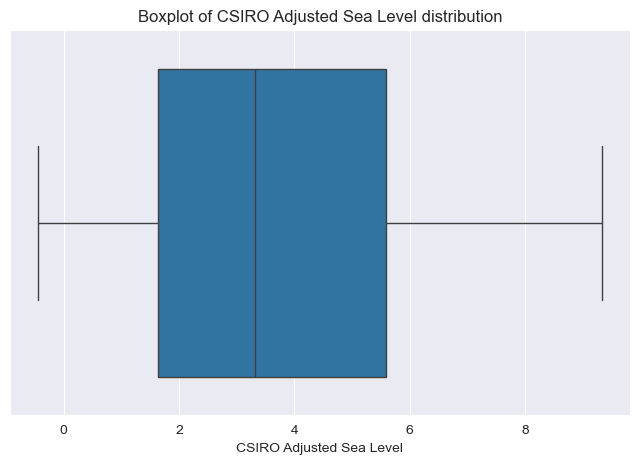

In [4]:
# Your code here:
# Calculate Q1 (25th percentile), Q3 (75th percentile), and IQR for sea level
q1_level = df["CSIRO Adjusted Sea Level"].quantile(0.25)
q3_level = df["CSIRO Adjusted Sea Level"].quantile(0.75)
iqr_level = q3_level - q1_level
print(f"25th percentile of sea level: {q1_level}")
print(f"75th percentile of sea level: {q3_level}")
print(f"IQR level: {iqr_level}")

# Visualize IQR using a boxplot
plt.figure(figsize = (8, 5))
sns.boxplot(x = df["CSIRO Adjusted Sea Level"])
plt.title("Boxplot of CSIRO Adjusted Sea Level distribution")
plt.show()


## **Exercise 3: Exploring Distributions**
🔹 **Question:** Create a **boxplot** of sea level rise grouped by decade (e.g., 1880-1890, 1891-1900, etc.). e?

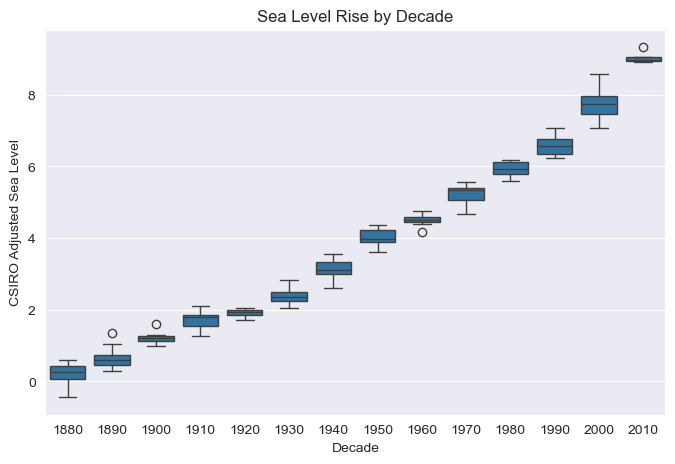

In [5]:
# Your code here:
df['Decade'] = (df['Year'] // 10) * 10
sea_level_by_decade = df.groupby('Year')['CSIRO Adjusted Sea Level'].mean()

plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Decade"], y=df["CSIRO Adjusted Sea Level"], data = df)
plt.title("Sea Level Rise by Decade")
plt.xlabel('Decade')
plt.ylabel('CSIRO Adjusted Sea Level')
plt.show()

## **Exercise 4: Hypothesis Testing on Trends**
🔹 **Question:** Perform a **T-test** to check if the mean sea level in the 21st century (2000-2014) is significantly higher than in the 20th century (1900-1999).  



T-test (21st vs 20th Century Sea Level): t-stat = 9.159411123588008, p-value = 2.8739747491456557e-15


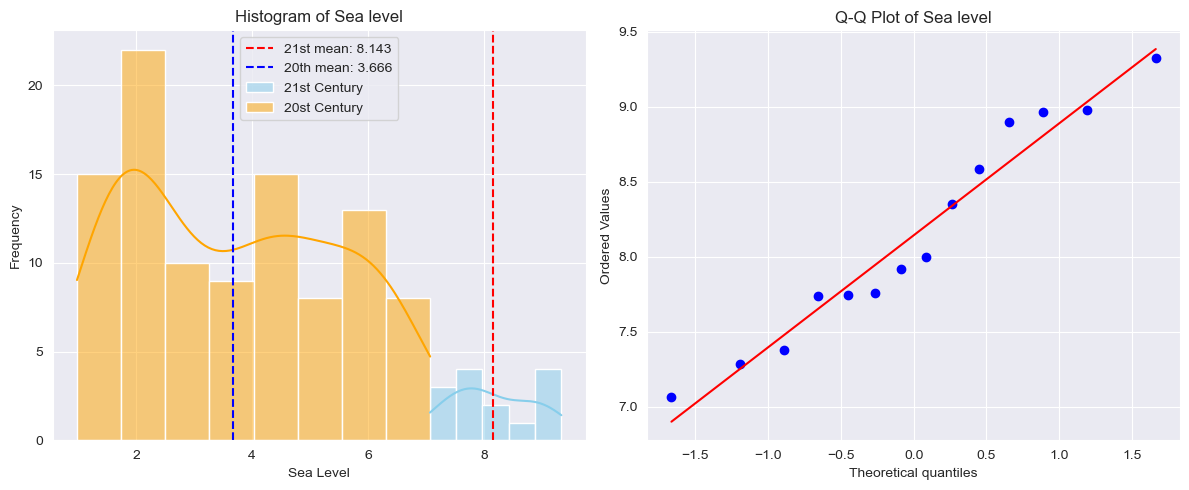

In [6]:
from scipy.stats import ttest_ind

# Your code here:
# check if the mean sea level in the 21st century (2000-2014) is significantly higher than in the 20th century (1900-1999)

# Extract the first 29 days of Monero prices
xs21 = df[(df['Year'] >= 2000) & (df['Year'] <= 2014)]['CSIRO Adjusted Sea Level']
xs20 = df[(df['Year'] >= 1900) & (df['Year'] <= 1999)]['CSIRO Adjusted Sea Level']


# Perform a t-test: is the mean sea level in the 21st century (2000-2014) is significantly higher than in the 20th century (1900-1999)?
t_stat, p_val = ttest_ind(xs21, xs20)

# Display test statistic and p-value
print(f"\nT-test (21st vs 20th Century Sea Level): t-stat = {t_stat}, p-value = {p_val}")

plt.figure(figsize=(12, 5))

# Histogram + KDE for the 21st century
plt.subplot(1, 2, 1)
sns.histplot(xs21, kde=True, color='skyblue', label='21st Century')
sns.histplot(xs20, kde=True, color='orange', label='20st Century')
plt.axvline(xs21.mean(), color='red', linestyle='--', label=f"21st mean: {xs21.mean():.3f}")
plt.axvline(xs20.mean(), color='blue', linestyle='--', label=f"20th mean: {xs20.mean():.3f}" )
plt.title("Histogram of Sea level")
plt.xlabel("Sea Level")
plt.ylabel("Frequency")
plt.legend()

# Q-Q plot to check for normality of the sample (assumption for t-test)
plt.subplot(1, 2, 2)

stats.probplot(xs21, dist="norm", plot=plt)
plt.title("Q-Q Plot of Sea level")

# Adjust layout for a clean display
plt.tight_layout()
plt.show()

## **Exercise 5: Probability Distributions**
🔹 **Question:** Fit a **Poisson distribution** to the sea level rise data. ? 


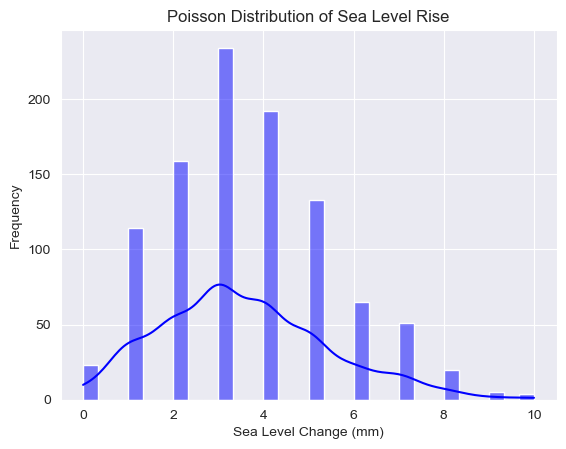

In [10]:
# Your code here:
# Estimate the mean of sea level changes
lambda_value = df["CSIRO Adjusted Sea Level"].mean()

# Generate Poisson distribution
poisson_data = np.random.poisson(lam=lambda_value, size=1000)

# Plot distribution
sns.histplot(poisson_data, kde=True, bins=30, color="blue")
plt.title("Poisson Distribution of Sea Level Rise")
plt.xlabel("Sea Level Change (mm)")
plt.ylabel("Frequency")
plt.show()

## **Exercise 6: Correlation Analysis**
🔹 **Question:** Check if there is a correlation between **CSIRO Adjusted Sea Level** and **NOAA Adjusted Sea Level**.  


Pearson Correlation:
Correlation Coefficient: 0.977
P-value: 0.000

Spearman Correlation:
Correlation Coefficient: 0.981
P-value: 0.000


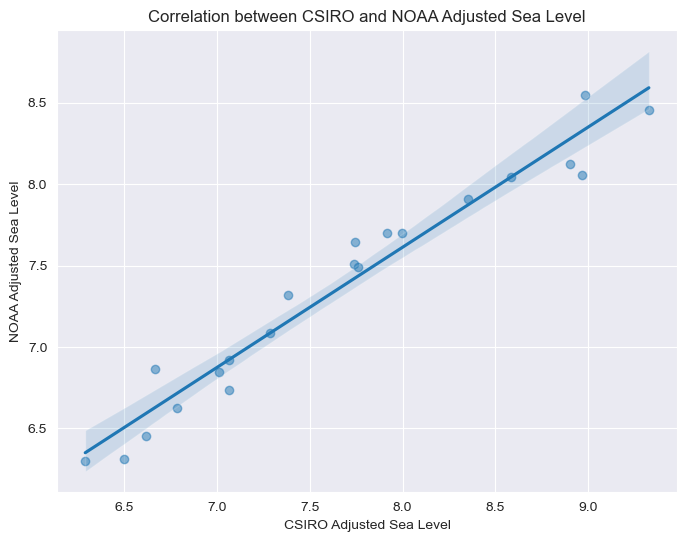

In [8]:
# Your code here:
from scipy.stats import pearsonr, spearmanr

df_clean = df.dropna(subset=['CSIRO Adjusted Sea Level', 'NOAA Adjusted Sea Level'])
cs_level = df_clean['CSIRO Adjusted Sea Level']
no_level = df_clean['NOAA Adjusted Sea Level']

# Calculate Pearson correlation (for linear relationships)
pearson_corr, pearson_p_value = pearsonr(cs_level, no_level)

# Calculate Spearman correlation (for non-linear monotonic relationships)
spearman_corr, spearman_p_value = spearmanr(cs_level, no_level)

# Print the results
print("\nPearson Correlation:")
print(f"Correlation Coefficient: {pearson_corr:.3f}")
print(f"P-value: {pearson_p_value:.3f}")

print("\nSpearman Correlation:")
print(f"Correlation Coefficient: {spearman_corr:.3f}")
print(f"P-value: {spearman_p_value:.3f}")


# Create a scatter plot with a regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='CSIRO Adjusted Sea Level', y='NOAA Adjusted Sea Level', data=df_clean, scatter_kws={'alpha':0.5}) 
plt.title('Correlation between CSIRO and NOAA Adjusted Sea Level')
plt.xlabel('CSIRO Adjusted Sea Level')
plt.ylabel('NOAA Adjusted Sea Level')
plt.show()


## **Exercise 7: Summary Reflection**
🔹 **Question:** Summarize your findings from this analysis.  

In [9]:
# Your code here:
# the IQR is approximately 3.95. This means the middle 50% of sea level data falls within a range of about 3.95 units. This suggests that while the central tendency is likely somewhere around the middle of these values, there is a noticeable variability in the observed sea levels.

# Since the p-value is far below 0.05, we reject the null hypothesis. This provides very strong evidence that the distribution of CSIRO adjusted sea levels is significantly different between 20th and 21st century.

# A correlation coefficient of 0.977 indicates a very strong positive linear relationship between CSIRO Adjusted Sea Level and NOAA Adjusted Sea Level. This means that as one variable increases, the other variable also tends to increase, and this relationship is very consistent.